<a href="https://colab.research.google.com/github/GraLesl/MAT-421/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I. Introduction to the Problem
Breast cancer is extremely pervasive in the United States. It is the most common type of cancer for women, and makes up roughly one third of all new cancer diagnoses. Breast cancer can be difficult to diagnose, because many of the common tests are only as accurate as the doctor who visually assesses them (Tsochatzidis et al, 2019).

Generally, the first test for breast cancer is a mammogram. If it comes back positive, the patient often has a Fine Needle Aspirate (FNA) test. This is a type of biopsy that takes fluid and tissue from breast lesions in a minimally-invasive outpatient procedure. Then, a professional looks at the sample under a microscope and visually determines the results (Casaubon et al, 2023). Similarly to mammograms, FNA has a wide range of accuracy based on the practitioner inspecting the sample. One study found that humans are able to correctly identify malignant tumors with this method 65% - 98% of the time (Sizilio et al, 2012). This inconsistency can cause issues for patients, who either undergo more serious procedures unnecessarily, or risk allowing legitimate cancer to spread.

The objective of this research is to provide a more consistent way to accurately diagnose breast cancer based on fine needle aspirate data. This would reduce the variable accuracy caused by human interpretation. One study already made a prediction model using fuzzy logic (Sizilio et al, 2012). This was very effective, but it is worth researching further to see if a simpler model (like linear regression) can achieve the same level of accuracy. If a model can perform the same, but using less features of the FNA images, it would require less human measurements for input, and would thus save time.


## II. Related Work

As mentioned in the introduction, mammograms are often the first line of diagnosis for breast cancer. Mammograms take an image of the breasts, and from that a radiologist determines if a mass is benign or malignant. One study looked into using deep learning to diagnose based on these images. One benefit of deep learning is that it can determine what features are useful itself, without needing experts to weigh in. This study specifically compared different convolutional neural networks (CNNs). The researchers tested each CNN in two ways: as a pre-trained model that was being fine-tuned, and as a model training from scratch. Their best model was pre-trained ResNet-101, which had an accuracy of 0.785 for one data set, and 0.753 for the other. This study directly used the mammogram images as input data, rather than discrete measurements from the photos (Tsochatzidis et al, 2019).

Another study used the same data as this research. It used measurements of certain features in FNA images as the input, and analyzed it with fuzzy logic. Unlike deep learning, fuzzy logic requires a Rules Base formed by specialist input or numerical data. This method split each feature into two descriptors, e.g. perimeter was split into “smaller” and “larger.” Each data point was then defined as a mix of those two descriptors, with the weighting going from 0 to 1. Then, rules were defined to assess these off of. For example, one was, “If smaller area and smaller perimeter and more uniform and more homogenous, then benign diagnosis.” This was refined by adjusting the membership functions, which are the graphs showing the split of two descriptors for each feature. At the end of this process, the best model had a sensitivity of 98.59% and a specificity of 85.43% (Sizilio et al, 2012). Though this process was effective, it did require expert input. This research project is interested to see if a more simple model can perform comparatively, with less expertise and human input.


## III. Propsed Methodology and Models

#### A. Methodology
To further the predictive models of breast cancer masses, the team proposes developing a linear regression model (from the SciKit library) trained on 30 different FNA imaging features to diagnose malignant versus benign masses. The data set used will be split into two halves, one to train the model and another to evaluate its efficacy. To convert the diagnosis data to something trainable, all data points which are labeled malignant will be replaced with a one, and benign data will be replaced with a zero. Then, the model's output will range from zero to one - indicating how confident it is in its diagnosis. Initially, the cutoff for diagnosis will be at 0.5. However, further trials will vary this cutoff and evaluate efficacies at different values.

After an optimal cutoff has been set, the team will then seek to minimize the number of input parameters needed to achieve sufficient efficacy. This will be driven through the p-values of each variable, to determine their impact on diagnostic accuracy.

#### B. Data Collection

The data used for this project comes from the diagnostic Wisconsin Breast Cancer Database. It contains features measured from a digital image of a fine needle aspirate (FNA) of a breast mass. The features include diagnosis, radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

#### C. Analysis Plan

This linear regression model will be evaluated on two key parameters, sensitivity and specificity. Sensitivity refers to a model's ability to identify true positives. And specificity refers to the model's ability to identify true negatives. These two metrics can be compared against previous models to determine how the linear regression model compares. Additionally, during internal trials adapting the cutoff value and feature cutting, sensitivity and specificity will be again used as criterion for which models perform better.



## IV. Experiment Setup
This experiment is being conducted in two phases. First, the cutoff value will be set at 10 evenly spaced values between zero and one. The test data will then be analyzed, yielding specificity and sensitivity data for each cutoff. From there, each value can be compared to find what cutoff yields the most effective model.

Second, the p-value of each variable will be tabulated using the statsmodel library. The least impactful feature will be continually removed and the model re-evaluated until the model drops below 65% average specificity and sensitivity (the minimum accuracy of a human predictor), or the model loses more than 2% due to the removal of a single factor.


## V. Expected Results
Preliminary testing has proven that a linear regression model is capable of consistently predicting individual cases. As such, the team believes an efficacy similar to that of trained physicians at 80%. It is expected that the most accurate results will come at a cutoff value of 0.5. And the team aims to decrease necessary input features by 25%, with minimal losses in accuracy.

## VI. Preliminary Code

Shown below is the preliminary code for creating a linear regression model on the specified dataset. While it is not currently running, as file access is being worked on, its preliminary tests show positive results.

Mounted at /content/drive


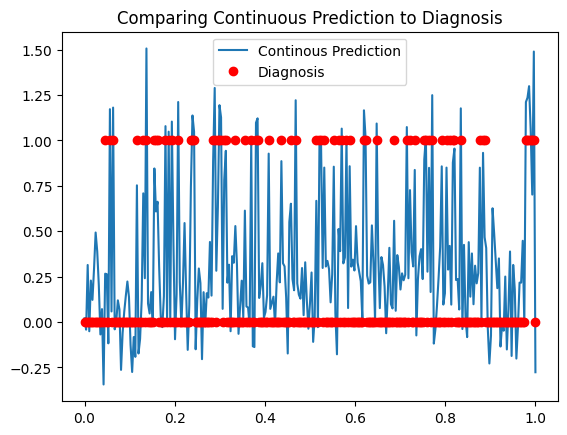

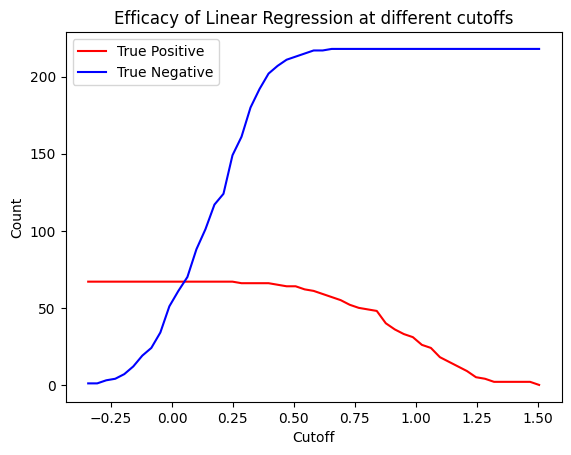

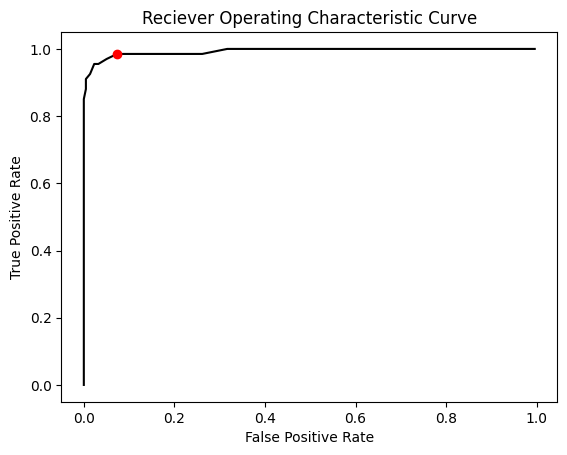

0.39629980568589573


In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from google.colab import drive
from scipy import stats
import matplotlib.pyplot as plt

drive.mount('/content/drive')

## Grant
path = "/content/drive/MyDrive/data.csv"

## Erin

# Read Data and put in an array
df = np.array(pd.read_csv(path))

# Convert diagnosis results to 1/0
for i, n in enumerate(df[:,1]):
  if n == 'M':
    df[i,1] = 1
  else:
    df[i,1] = 0

# Calculate the midpoint of the DataFrame
midpoint = df.shape[0] // 2

# Split the DataFrame into two halves
df_1 = df[:midpoint]
df_2 = df[midpoint:]

# Apply a linear regression model based on the given parameters
reg = linear_model.LinearRegression()
reg.fit(df_1[:,2:32], df_1[:,1])

# Predict the second half of the data set
prediction = reg.predict(df_2[:,2:32])

# Compare predictions to expected results
X = arr = np.linspace(0, 1, num=prediction.shape[0])

plt.figure(1)
plt.plot(X,prediction,X,df_2[:,1],'ro')
plt.legend(['Continous Prediction', 'Diagnosis'])
plt.title('Comparing Continuous Prediction to Diagnosis')
plt.show()

# Convert the continuous predictions into descrete diagnosis based of a given cutoff value
def cont2discrete(predictions, cutoff):
  tempPred = np.copy(predictions)
  for i, n in enumerate(predictions):
    if n > cutoff:
      tempPred[i] = 1
    else:
      tempPred[i] = 0
  return tempPred

# Evaluate the number of true/false positivse/negatives based on a prediction and given cutoff
def evaluate(prediction, cutoff, data):
  tPred = cont2discrete(prediction, cutoff)
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i, n in enumerate(prediction):
    if tPred[i] == 0 and data[i,1] == 0:
      tn += 1
    elif tPred[i] == 1 and data[i,1] == 1:
      tp += 1
    elif tPred[i] == 1 and data[i,1] == 0:
      fp += 1
    elif tPred[i] == 0 and data[i,1] == 1:
      fn += 1
  return [tp,tn,fp,fn]

# Establish range of cutoff values
cutoffs = np.linspace(min(prediction), max(prediction), num=51)
# Create a vector of all tp,tn,fp,fn results for each cutoff
efficacy = np.zeros((cutoffs.shape[0],4))

# Evaluate each cutoff value for its efficacy
for i, n in enumerate(cutoffs):
  efficacy[i] = evaluate(prediction,n,df_2)

# Plot the raw true negative and true positive values with respect to cutoff
plt.figure(2)
plt.plot(cutoffs, efficacy[:,0], 'r', cutoffs, efficacy[:,1], 'b',)
plt.legend(['True Positive', 'True Negative'])
plt.title('Efficacy of Linear Regression at different cutoffs')
plt.xlabel('Cutoff')
plt.ylabel('Count')
plt.show()

# Find the false positive and true positive rate
fpr = efficacy[:,2] / (efficacy[:,2] + efficacy[:,1]);
tpr = efficacy[:,0] / (efficacy[:,0] + efficacy[:,3]);

# Ratio of acceptable change in false positives for a change in false negatives
ratio = 3 # An increase of 1 True positive is worth 5 false positives
bp = 0 # Best performance

# Find the percent change in true positive rates
for i in range(len(fpr) - 1) :
  # Delta in tpr and fpr
  dT = tpr[i+1] - tpr[i]
  dP = fpr[i+1] - fpr[i]

  # Exclude points where one doesnt change and check the ratio in change
  if dT != 0 and dP != 0:
    change = dP / dT
    # First point that yeilds less than we would like, break out
    if change < ratio:
      bp = i
      break
  else:
    change = 0



# Make an ROC plot of true positive rate and false positive rate
plt.figure(3)
plt.plot(fpr, tpr, 'k',fpr[bp],tpr[bp],'ro')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve')
plt.show()

print(cutoffs[bp])

# References

Casaubon, J. T. (2023, July 23). *Fine needle aspiration of breast masses.*   StatPearls [Internet]. https://www.ncbi.nlm.nih.gov/books/NBK470268/

Sizilio, G. R., Leite, C. R., Guerreiro, A. M., & Neto, A. D. D. (2012, November 2). *Fuzzy method for pre-diagnosis of breast cancer from the fine needle aspirate analysis - biomedical engineering online.* BioMedical Engineering Online. https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-11-83

Tsochatzidis, L., Costaridou, L., & Pratikakis, I. (2019). *Deep learning for breast cancer diagnosis from mammograms—a comparative study.* Journal of Imaging, 5(3), 37. https://doi.org/10.3390/jimaging5030037